<a href="https://colab.research.google.com/github/dcochera/nn/blob/main/cw_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Setting up google drive 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/neuralNets')

Mounted at /content/gdrive


In [3]:
import my_utils as mu
import torch
from torch import nn
from IPython import display
import math

In [4]:

from torch.utils import data
from torchvision import transforms
import torchvision

def get_dataloader_workers():  
    """Use 4 processes to read the data."""
    return 4

# Defined in file: ./chapter_linear-networks/image-classification-dataset.md
def load_data(batch_size, resize=None):  
    """Download the Fashion-MNIST dataset and then load it into memory."""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    
    train_loader = data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers())
    
    test_loader = data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers())
    
    return (train_loader, test_loader)

In [5]:
batch_size = 256



train_iter, test_iter = load_data(batch_size)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# training_transforms = torchvision.transforms.Compose([
#     torchvision.transforms.Resize(size=(32, 32)),
#     torchvision.transforms.RandomCrop(size=(28, 28)),
#     torchvision.transforms.RandomRotation(degrees=30, interpolation=PIL.Image.BILINEAR),
#     torchvision.transforms.ToTensor(),
#     torchvision.transforms.Normalize(mean=(0.5,), std=(0.5,)),
#     # normalize does (x_i - mean) / std
#     # if images are [0, 1], they will be [-1, 1] afterwards
# ])

# test_transforms = torchvision.transforms.Compose([
#     torchvision.transforms.ToTensor(),
#     torchvision.transforms.Resize(size=(32, 32)),
#     torchvision.transforms.CenterCrop(size=(28, 28)),
#     torchvision.transforms.Normalize(mean=(0.5,), std=(0.5,)),
# ])


# train_dataset = datasets.MNIST(root='data', 
#                                train=True, 
#                                transform=training_transforms,
#                                download=True)

# test_dataset = datasets.MNIST(root='data', 
#                               train=False, 
#                               transform=test_transforms)


# train_loader = DataLoader(dataset=train_dataset, 
#                           batch_size=BATCH_SIZE, 
#                           shuffle=True)

# test_loader = DataLoader(dataset=test_dataset, 
#                          batch_size=BATCH_SIZE, 
#                          shuffle=False)

In [10]:
X, y = next(iter(train_iter)) # first batch
# print(X.size())
# print(len(y))
d = X
d = d.view(-1, 784)
t = nn.Linear(784, 225)
# print(t)
r = t(d)
print(r.size())

# r = torch.reshape(r, (256, 15,15))
# print(r[0].size())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([256, 225])


In [11]:
class Stem(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Stem, self).__init__()
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.Linear1 = nn.Linear(num_inputs,  num_outputs)
        torch.nn.init.normal_(self.Linear1.weight, std=0.01) #init the weights
        torch.nn.init.zeros_(self.Linear1.bias) #init the bias

    def forward(self, x):
        x = x.view(-1, self.num_inputs)
        x = self.Linear1(x)
       
        sz = int(math.sqrt(self.num_outputs))
       
        out = torch.reshape(x, (len(x), sz, sz))
        return out


stn = Stem(784, 225)
d = X
r = stn(d)
print(r.size())

torch.Size([256, 15, 15])


In [12]:
def init_weights(m):
    if isinstance(m, nn.Linear): # by checking the type we can init different layers in different ways
        torch.nn.init.normal_(m.weight, std=0.01)
        torch.nn.init.zeros_(m.bias)

# net1.apply(init_weights);
# print(net)

In [13]:
class MLP1(torch.nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super(MLP1, self).__init__()
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        self.Linear1 = nn.Linear(num_inputs,  num_hidden)
        self.Linear2 = nn.Linear(num_hidden,  num_outputs)
        torch.nn.init.normal_(self.Linear1.weight, std=0.01) #init the weights
        torch.nn.init.zeros_(self.Linear1.bias) #init the bias
        torch.nn.init.normal_(self.Linear2.weight, std=0.01) #init the weights
        torch.nn.init.zeros_(self.Linear2.bias) #init the bias

    def forward(self, x):
        x = x.view(-1,self.num_inputs)
        x = torch.relu(self.Linear1(x))
        x = torch.relu(self.Linear2(x))

        sz = int(math.sqrt(self.num_outputs))
        out = torch.reshape(x, (len(x), sz, sz))
        
        out = torch.transpose(out,1,2)
      
        return out



num_inputs, num_hidden, num_outputs = 225,169, 100
net1 = MLP1(num_inputs,num_hidden, num_outputs)
# net1.apply(init_weights);
print(net1(r).size())


torch.Size([256, 10, 10])


In [14]:
class MLP2(torch.nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super(MLP2, self).__init__()
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        self.Linear1 = nn.Linear(num_inputs,  num_hidden)
        self.Linear2 = nn.Linear(num_hidden,  num_outputs)
        torch.nn.init.normal_(self.Linear1.weight, std=0.01) #init the weights
        torch.nn.init.zeros_(self.Linear1.bias) #init the bias
        torch.nn.init.normal_(self.Linear2.weight, std=0.01) #init the weights
        torch.nn.init.zeros_(self.Linear2.bias) #init the bias

    def forward(self, x):
        x = x.reshape(-1, self.num_inputs)
        x = torch.relu(self.Linear1(x))
        out = self.Linear2(x)
        return out

# Alternative Initialization
* This is useful if you have multiple layers of the same type and you want them to be initialized in the same way.

In [15]:
loss = nn.CrossEntropyLoss()
# loss = nn.MSELoss()

In [16]:
# optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
# optimizer = torch.optim.Adam(net1.parameters(), lr=0.001)

In [17]:
def accuracy(y_hat, y):  #y_hat is a matrix; 2nd dimension stores prediction scores for each class.
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1) # Predicted class is the index of max score         
    cmp = (y_hat.type(y.dtype) == y)  # because`==` is sensitive to data types
    return float(torch.sum(cmp)) # Taking the sum yields the number of correct predictions.

# Example: only 1 sample is correctly classified.
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
accuracy(y_hat, y) / len(y)

0.5

In [18]:
class Accumulator:  
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n # [0, 0, ..., 0]
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

In [19]:
def evaluate_accuracy(net, data_iter): 
    """Compute the accuracy for a model on a dataset."""
    metric = Accumulator(2)  # No. of correct predictions, no. of predictions
    for _, (X, y) in enumerate(data_iter):
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

* The accuracy of the model prior to training should be close to random guessing, i.e., 0.1 for 10 classes.


In [20]:
# evaluate_accuracy(net, test_iter)

In [21]:
def train_epoch_ch3(net, train_iter, loss, optimizer, batch_size=256, num_outputs=10):  
    """The training function for one epoch."""
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accumulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        one_hot = torch.nn.functional.one_hot(y).float()
        l = loss(y_hat, one_hot)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        metric.add(float(l) * len(y), accuracy(y_hat, y), y.size().numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

In [22]:
class Animator:  
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(4, 3)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        mu.use_svg_display()
        self.fig, self.axes = mu.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: mu.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [23]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, optimizer):  
    """Train a model."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, optimizer)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics


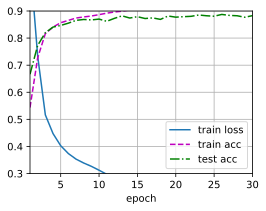

In [24]:
num_epochs = 30
net = nn.Sequential(Stem(784,625),nn.ReLU(), MLP1(625,400,225),nn.ReLU(),MLP2(225,100,10))
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

train_ch3(net, train_iter, test_iter, loss, num_epochs, optimizer)

In [25]:
evaluate_accuracy(net, test_iter)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.8828

In [26]:
# res = torch.rand(2,20) #2 rows(samples), 20 cols(feat)
# print(len(res))

2
